In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "high_z"
key = "z"
quantile = "2"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

16it [00:00, 152.98it/s]

33it [00:00, 155.85it/s]

50it [00:00, 158.14it/s]

67it [00:00, 159.77it/s]

85it [00:00, 162.95it/s]

101it [00:00, 160.48it/s]

118it [00:00, 160.38it/s]

136it [00:00, 163.17it/s]

153it [00:00, 164.18it/s]

169it [00:01, 162.77it/s]

186it [00:01, 161.75it/s]

202it [00:01, 160.33it/s]

219it [00:01, 161.13it/s]

235it [00:01, 130.52it/s]

252it [00:01, 138.77it/s]

270it [00:01, 146.77it/s]

287it [00:01, 152.55it/s]

303it [00:01, 150.16it/s]

319it [00:02, 134.11it/s]

336it [00:02, 141.64it/s]

351it [00:02, 131.08it/s]

367it [00:02, 137.75it/s]

382it [00:02, 137.09it/s]

399it [00:02, 144.42it/s]

415it [00:02, 148.00it/s]

432it [00:02, 151.66it/s]

448it [00:02, 152.34it/s]

465it [00:03, 155.91it/s]

481it [00:03, 154.14it/s]

499it [00:03, 159.37it/s]

516it [00:03, 161.73it/s]

533it [00:03, 163.38it/s]

550it [00:03, 164.32it/s]

568it [00:03, 165.73it/s]

585it [00:03, 162.03it/s]

603it [00:03, 164.67it/s]

620it [00:04, 162.23it/s]

637it [00:04, 162.51it/s]

655it [00:04, 165.97it/s]

672it [00:04, 159.92it/s]

689it [00:04, 159.87it/s]

706it [00:04, 156.38it/s]

723it [00:04, 158.81it/s]

739it [00:04, 158.72it/s]

756it [00:04, 160.68it/s]

773it [00:05, 145.38it/s]

790it [00:05, 149.89it/s]

806it [00:05, 148.32it/s]

822it [00:05, 147.72it/s]

837it [00:05, 134.72it/s]

853it [00:05, 139.82it/s]

870it [00:05, 147.51it/s]

888it [00:05, 154.90it/s]

906it [00:05, 159.49it/s]

924it [00:05, 162.67it/s]

941it [00:06, 163.84it/s]

959it [00:06, 167.72it/s]

976it [00:06, 168.11it/s]

993it [00:06, 167.02it/s]

1010it [00:06, 166.52it/s]

1027it [00:06, 166.93it/s]

1044it [00:06, 165.57it/s]

1061it [00:06, 164.96it/s]

1079it [00:06, 166.53it/s]

1096it [00:07, 138.67it/s]

1111it [00:07, 139.35it/s]

1128it [00:07, 146.21it/s]

1144it [00:07, 123.77it/s]

1158it [00:07, 116.10it/s]

1171it [00:07, 112.48it/s]

1183it [00:07, 108.81it/s]

1195it [00:07, 110.37it/s]

1211it [00:08, 120.20it/s]

1228it [00:08, 129.88it/s]

1246it [00:08, 140.20it/s]

1263it [00:08, 146.94it/s]

1281it [00:08, 154.25it/s]

1298it [00:08, 156.15it/s]

1315it [00:08, 159.95it/s]

1332it [00:08, 157.35it/s]

1348it [00:08, 151.03it/s]

1365it [00:09, 154.97it/s]

1383it [00:09, 159.50it/s]

1400it [00:09, 162.14it/s]

1418it [00:09, 165.19it/s]

1435it [00:09, 163.96it/s]

1453it [00:09, 166.36it/s]

1472it [00:09, 170.78it/s]

1490it [00:09, 138.07it/s]

1505it [00:09, 128.29it/s]

1519it [00:10, 121.43it/s]

1532it [00:10, 118.13it/s]

1545it [00:10, 114.18it/s]

1557it [00:10, 113.25it/s]

1569it [00:10, 111.26it/s]

1578it [00:10, 148.48it/s]


0it [00:00, ?it/s]

18it [00:00, 172.11it/s]

Number of empty sat catalogs is 123


35it [00:00, 170.16it/s]

47it [00:00, 147.01it/s]

63it [00:00, 150.16it/s]

80it [00:00, 155.42it/s]

97it [00:00, 158.16it/s]

112it [00:00, 155.50it/s]

128it [00:00, 155.99it/s]

143it [00:00, 135.03it/s]

158it [00:01, 137.89it/s]

172it [00:01, 133.61it/s]

187it [00:01, 136.11it/s]

201it [00:01, 129.19it/s]

216it [00:01, 134.53it/s]

231it [00:01, 138.12it/s]

246it [00:01, 141.14it/s]

263it [00:01, 148.42it/s]

280it [00:01, 153.12it/s]

298it [00:02, 158.20it/s]

316it [00:02, 162.84it/s]

334it [00:02, 166.13it/s]

351it [00:02, 147.22it/s]

367it [00:02, 150.03it/s]

383it [00:02, 152.54it/s]

400it [00:02, 156.85it/s]

417it [00:02, 160.07it/s]

434it [00:02, 162.84it/s]

451it [00:02, 158.79it/s]

468it [00:03, 161.84it/s]

485it [00:03, 157.48it/s]

503it [00:03, 161.62it/s]

520it [00:03, 159.98it/s]

537it [00:03, 161.61it/s]

554it [00:03, 163.94it/s]

572it [00:03, 166.31it/s]

589it [00:03, 166.09it/s]

607it [00:03, 167.41it/s]

625it [00:04, 168.86it/s]

644it [00:04, 171.85it/s]

662it [00:04, 172.92it/s]

680it [00:04, 171.98it/s]

698it [00:04, 171.15it/s]

716it [00:04, 160.86it/s]

734it [00:04, 165.60it/s]

751it [00:04, 157.64it/s]

767it [00:04, 151.66it/s]

785it [00:05, 158.25it/s]

803it [00:05, 162.15it/s]

821it [00:05, 166.74it/s]

840it [00:05, 171.61it/s]

858it [00:05, 171.48it/s]

876it [00:05, 171.81it/s]

894it [00:05, 161.54it/s]

911it [00:05, 161.32it/s]

929it [00:05, 164.12it/s]

946it [00:05, 164.75it/s]

963it [00:06, 145.39it/s]

979it [00:06, 128.81it/s]

993it [00:06, 114.97it/s]

1006it [00:06, 112.63it/s]

1022it [00:06, 123.34it/s]

1040it [00:06, 134.66it/s]

1058it [00:06, 144.10it/s]

1074it [00:06, 146.85it/s]

1092it [00:07, 155.08it/s]

1110it [00:07, 161.31it/s]

1128it [00:07, 165.23it/s]

1145it [00:07, 166.34it/s]

1162it [00:07, 167.28it/s]

1180it [00:07, 168.06it/s]

1198it [00:07, 170.89it/s]

1216it [00:07, 173.09it/s]

1235it [00:07, 175.53it/s]

1253it [00:08, 175.01it/s]

1271it [00:08, 150.68it/s]

1287it [00:08, 135.97it/s]

1302it [00:08, 135.95it/s]

1320it [00:08, 146.15it/s]

1338it [00:08, 154.80it/s]

1356it [00:08, 160.65it/s]

1375it [00:08, 165.98it/s]

1393it [00:08, 167.24it/s]

1412it [00:09, 172.99it/s]

1430it [00:09, 173.64it/s]

1448it [00:09, 173.25it/s]

1466it [00:09, 169.75it/s]

1484it [00:09, 172.14it/s]

1503it [00:09, 175.28it/s]

1522it [00:09, 176.99it/s]

1541it [00:09, 180.35it/s]

1560it [00:09, 179.80it/s]

1578it [00:09, 158.31it/s]

Number of empty sat catalogs is 123


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError
/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:


In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

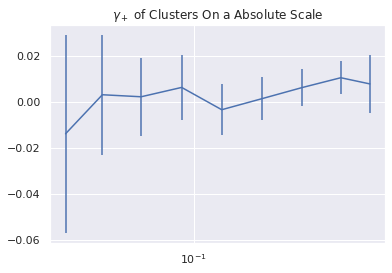

Aggregated xi:
[  0.       0.7969  -0.398   -0.5284  -2.2933   1.9447  -1.3105  -7.4368
 -13.0519  -2.5213]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -221.535   -419.4993  -663.7452  -877.3226 -1163.6584
 -1301.2438 -1209.1355  -687.5035   -67.981 ]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   58.  124.  227.  359.  591.  872. 1184. 1232.  319.]
------------------------------------------------------------------------------
Mean xi:
[    nan  0.0137 -0.0032 -0.0023 -0.0064  0.0033 -0.0015 -0.0063 -0.0106
 -0.0079]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.8196 -3.3831 -2.924  -2.4438 -1.969  -1.4923 -1.0212 -0.558
 -0.2131]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

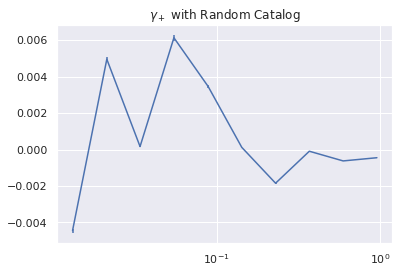

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 1.1191e-04 -1.2480e-04 -4.1830e-06 -1.5443e-04 -8.7219e-05 -3.0522e-06
  4.6474e-05  2.3124e-06  1.5695e-05  1.1269e-05]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

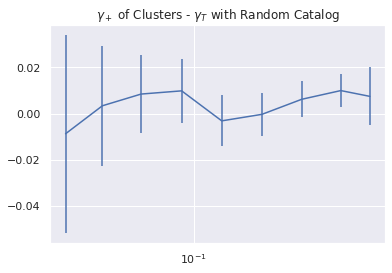

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

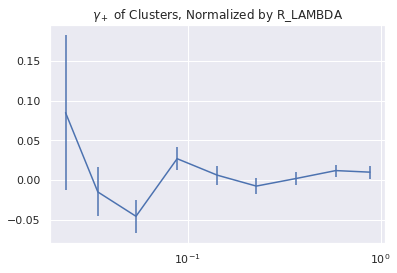

Aggregated xi:
[  0.      -1.2729   1.3601   7.7241  -7.8867  -2.9725   5.2632  -2.3723
 -15.4744  -9.167 ]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.       -56.3864  -313.7594  -499.0564  -706.3919  -901.8207
 -1073.4633 -1050.2509  -678.1321  -113.7753]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   15.   93.  171.  291.  463.  724. 1043. 1269.  897.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0849  0.0146  0.0452 -0.0271 -0.0064  0.0073 -0.0023 -0.0122
 -0.0102]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7591 -3.3738 -2.9185 -2.4275 -1.9478 -1.4827 -1.007  -0.5344
 -0.1268]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)